In [30]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import warnings
warnings.filterwarnings(action='ignore')

from scipy import stats
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)


# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [298]:
# DATA INPUT 

df = pd.read_csv('bank-full.csv', sep=';')

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA 

In [299]:
# Type check : 17columns 45k observations

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [141]:
# Null Check : There is no mission values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [142]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


## EDA 1 : y variables 
### (Telemarketing Success Yes Failure No)

In [144]:
# Check how many value in y to make sure Y is the binary variable.
# should be two (Yes, or No)
df.y.nunique()

2

In [145]:
# Check distribution of Y 
df.groupby('y')['y'].count()



y
no     39922
yes     5289
Name: y, dtype: int64

In [146]:
round(df['y'].value_counts()/ len(df)*100,2)

no     88.3
yes    11.7
Name: y, dtype: float64

We can see that this dataset is imbalanced. About 89% of the data has 'no' answer. This can be a problem because most machine learning algorithms assume balanced distributions. As the minority examples (here 'yes' answer) occur rarely, it is hard to find (or predict) small classes. Samples from the minority class are most often misclassified. Therefore, we need to deal with this imbalanced dataset carefully.

## EDA 2 : X Features (16 variables)

In [300]:
num_cols = list(df.select_dtypes(include=['int64','float64']).columns)
cat_cols = list(df.select_dtypes(include=['object']).columns)

cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

## EDA 2.1. Numerical variable
### its distribution and relationship between features


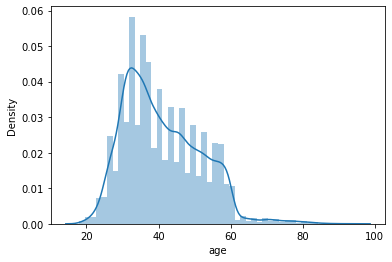

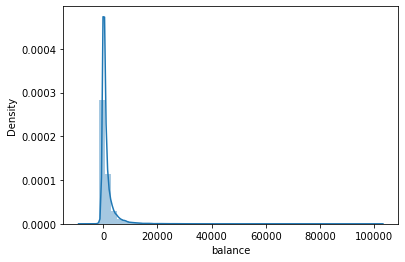

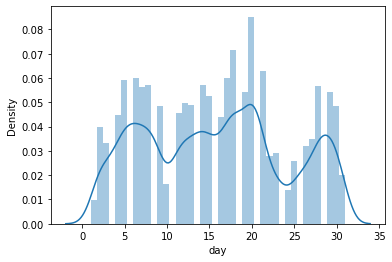

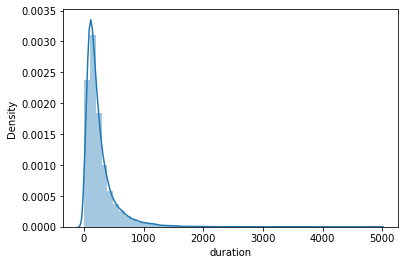

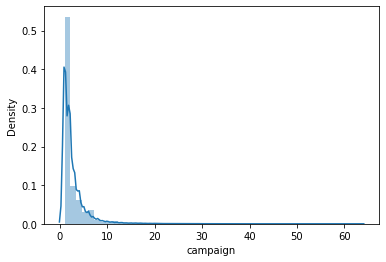

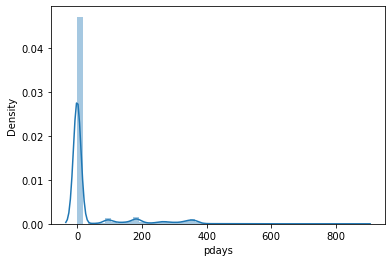

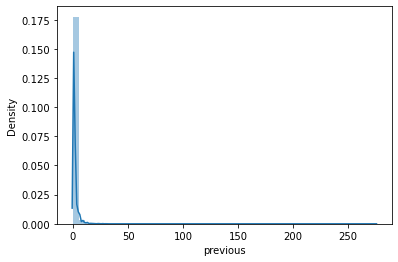

In [301]:
for name in num_cols:
    sns.distplot(df[name])
    plt.show()

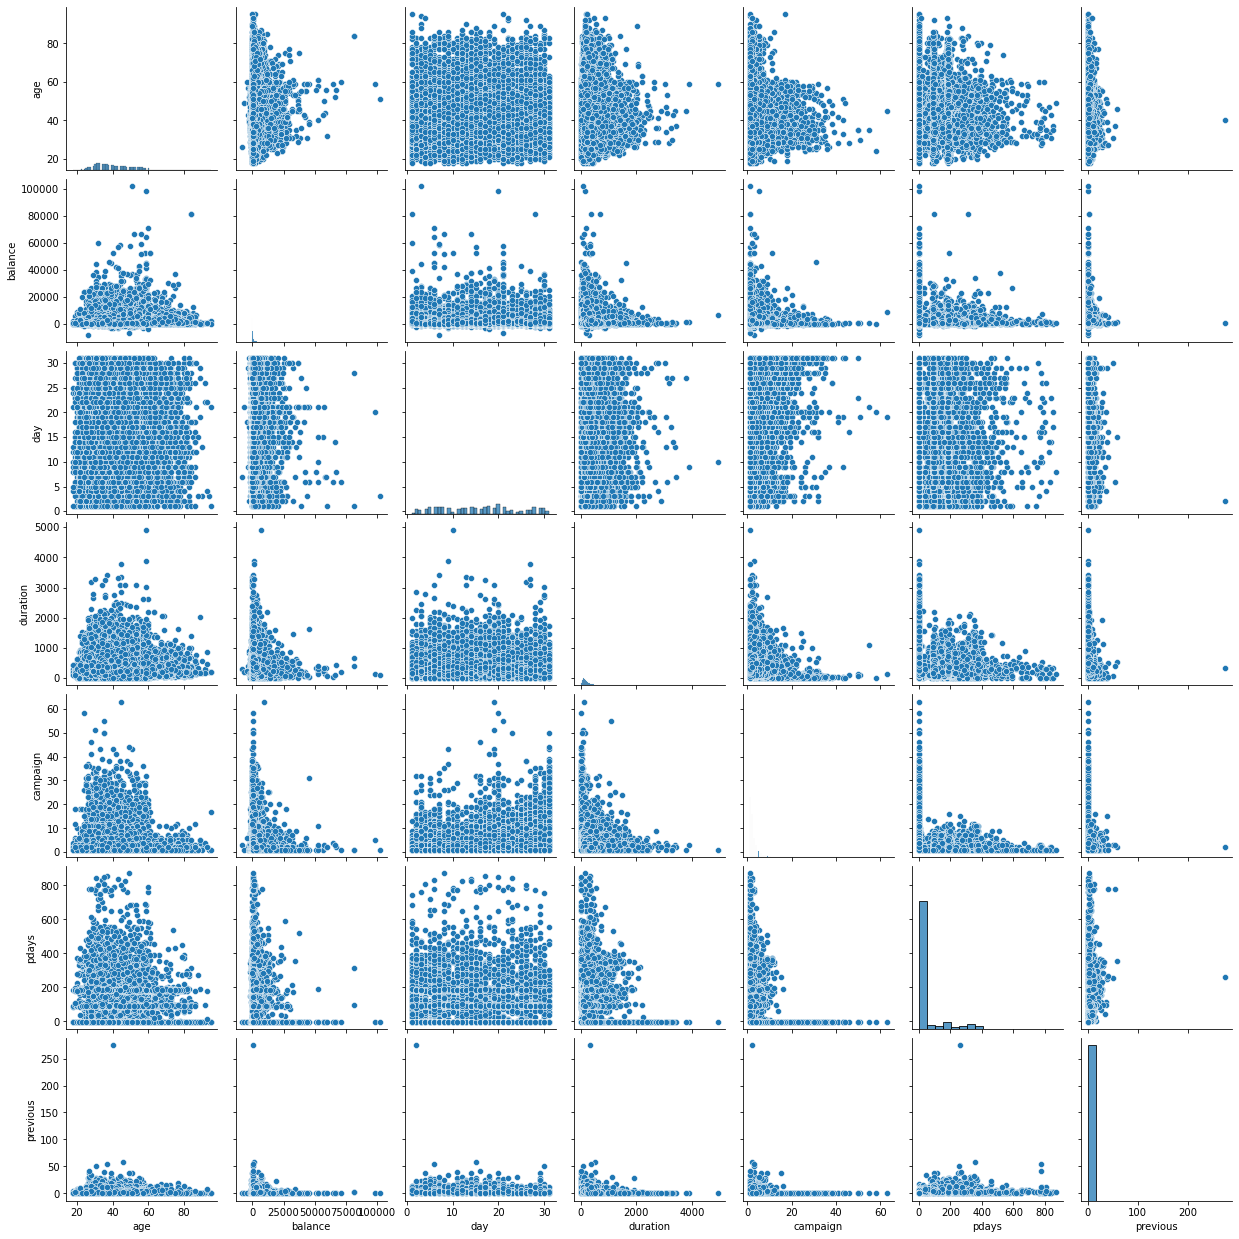

In [149]:
sns.pairplot(df)

###  - Distribution: There is no qaussian distribution

### - Outlier:  According to snsplot charts,  Duration - Max, Previous - Max  

In [151]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


(<AxesSubplot:>, 1)

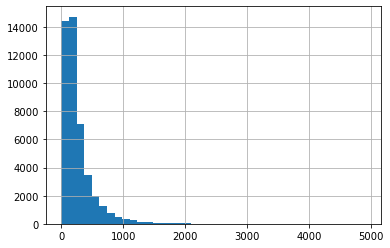

In [152]:
df['duration'].hist(bins=40), len(df[df['duration']> 4000])

(<AxesSubplot:>, 1)

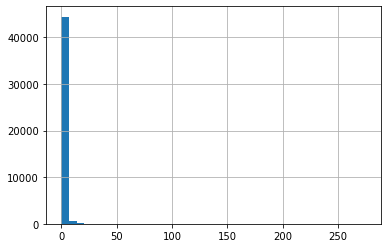

In [153]:
df['previous'].hist(bins=40), len(df[df['previous']>100])

In [302]:
# Remove the outlier 

df = df[df['duration']<4000]
df = df[df['previous']<100]

In [155]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000
mean,40.935831,1362.174921,15.806853,258.057997,2.763897,40.193833,0.574266
std,10.618656,3044.732112,8.322362,256.598908,3.098076,100.125339,1.907947
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,3881.000000,63.000000,871.000000,58.000000


### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

(<AxesSubplot:>, 6819)

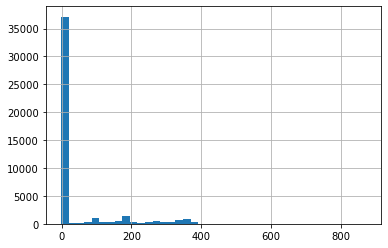

In [156]:
df['pdays'].hist(bins=40), len(df[df['pdays']>100])

In [303]:
# divide pdays into 3 groups
bins = [0, 7, 14, 30]
labels = ['1w', '2w', '>2w']
df['pdays_group'] = pd.cut(df['pdays'], bins=bins, labels=labels, include_lowest=False)

# I set include_lowest = False
# by doing so, the -1 values would not contain in any group
# it will be encoded as NaN

In [304]:
# change the dtype as object
df['pdays_group'] = df['pdays_group'].astype('O')

# fillna as Not contacted
df['pdays_group'].fillna('Not contacted', inplace=True)

In [305]:
df['pdays_group'].value_counts() / len(df)

Not contacted    0.995842
1w               0.001836
2w               0.001438
>2w              0.000885
Name: pdays_group, dtype: float64

In [306]:
# now we can drop pdays (original variable)
df.drop('pdays', axis=1, inplace=True)

### Age: make it as a categorical variable

### 17-30 for young adult, 31-40, 41-50, 51-60, and more than 61

(<AxesSubplot:>, 0)

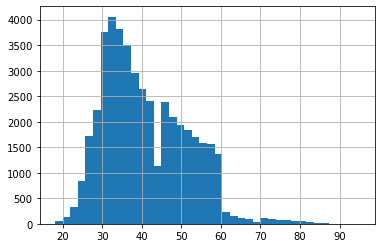

In [161]:
df['age'].hist(bins=40), len(df[df['age']>100])

In [307]:
# let's divide age into the bins
bins = [16, 30, 40, 50, 60, 100]

# bucket labels
labels = ['17-30', '31-40', '41-50', '51-60', '>60']


# discretization
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

Text(0.5, 1.0, 'Age group distribution')

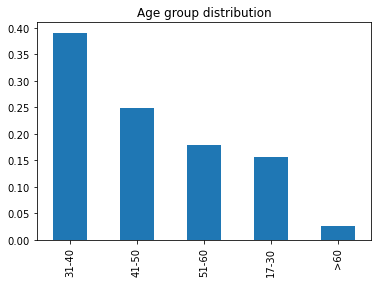

In [308]:
# Let's see the distribution of age_group
(df['age_group'].value_counts() / len(df)).plot.bar()
plt.title('Age group distribution')

In [309]:
# now we can drop age (original numberical variable)
# df.drop(['age'], axis=1, inplace=True)

In [310]:
# remove age and pdays from num_vars
num_cols.remove('age')
num_cols.remove('pdays')

# add age_group and pdays_group to cat_vars
cat_cols.append('age_group')
cat_cols.append('pdays_group')

In [311]:
num_cols

['balance', 'day', 'duration', 'campaign', 'previous']

## EDA 2.2. Categorical variable

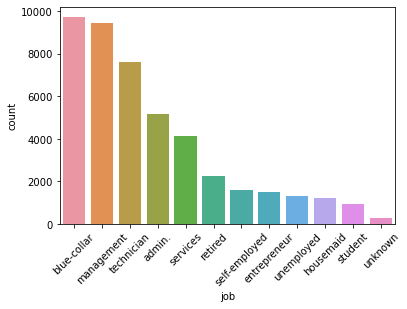

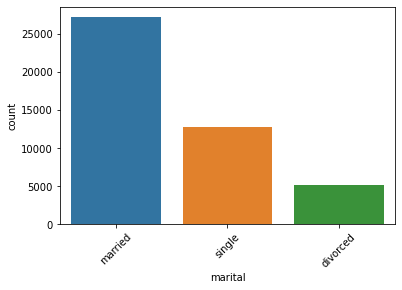

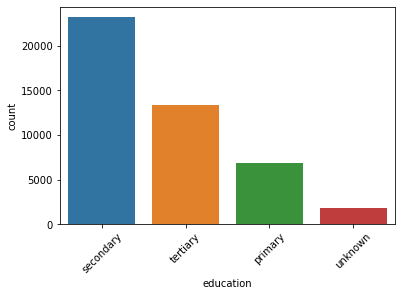

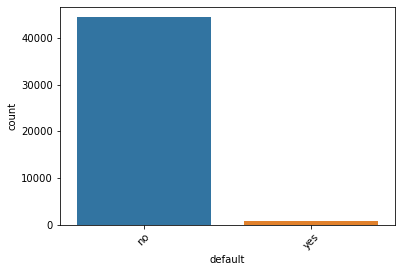

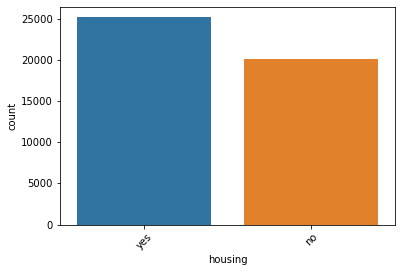

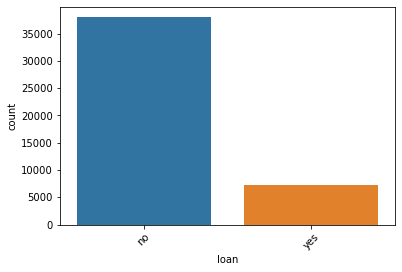

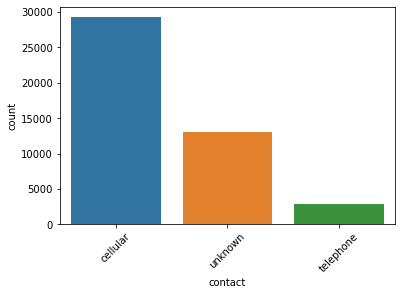

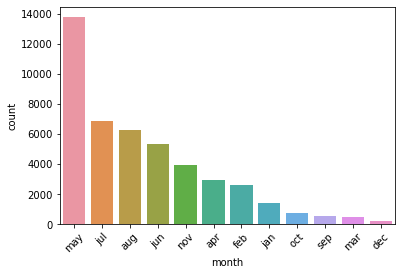

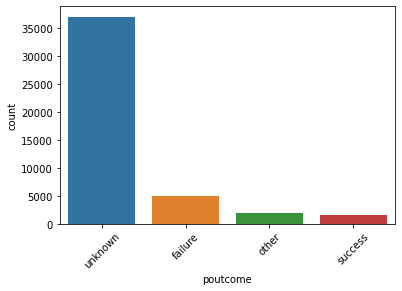

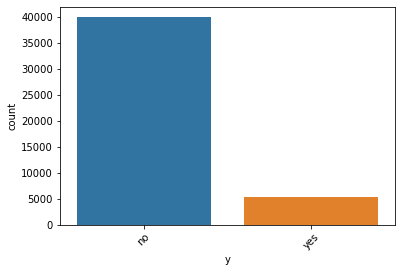

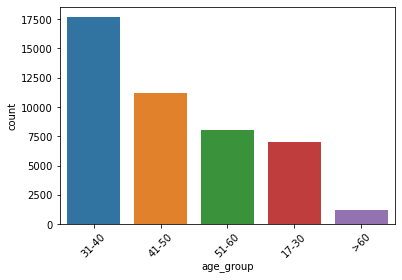

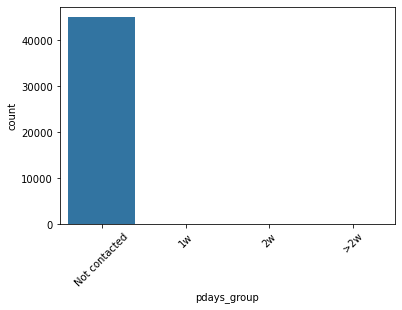

In [167]:
for name in cat_cols:
    sns.countplot(x=name, data=df, order=df[name].value_counts().index[::1])
    plt.xticks(rotation=45)
    plt.show()

## unknown remove by changing to the value of majority

####job-unknown --> blue-collar
####education-unknown --> secondary
####contact-unknown --> celluar
####poutcome-unknown --> failure


In [312]:
# Unknown to value of majority
df['job'] = df['job'].str.replace('unknown', 'blue-collar')
df['education'] = df['education'].str.replace('unknown', 'secondary')
df['contact'] = df['contact'].str.replace('celluar', 'cellular')
df['poutcome'] = df['poutcome'].str.replace('unknown', 'failure')

In [313]:
# Additional changes for better fit 
df['marital'] = df['marital'].str.replace('divorced', 'single')
df['poutcome'] = df['poutcome'].str.replace('other', 'failure')

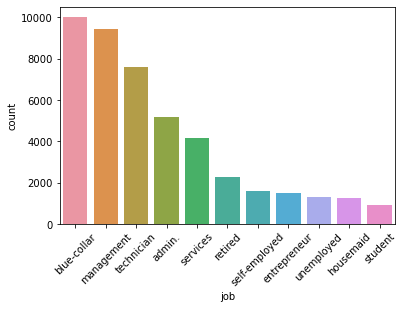

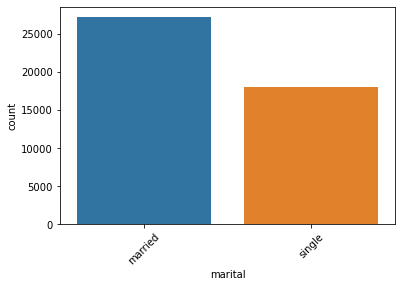

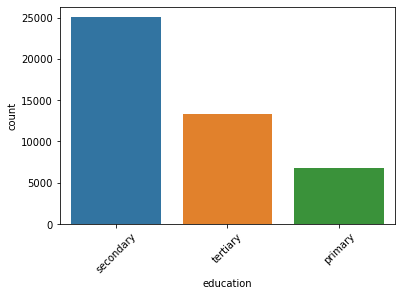

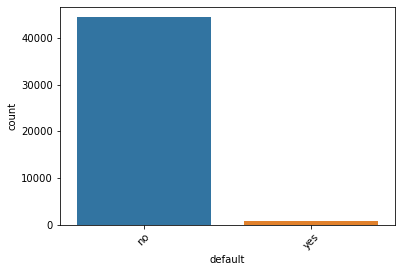

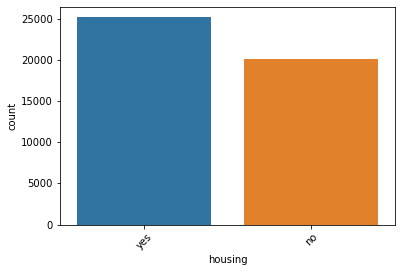

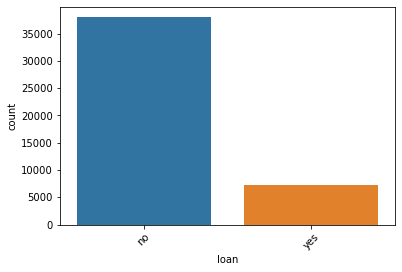

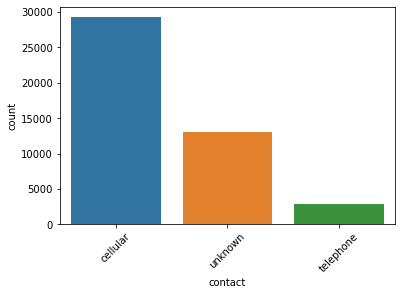

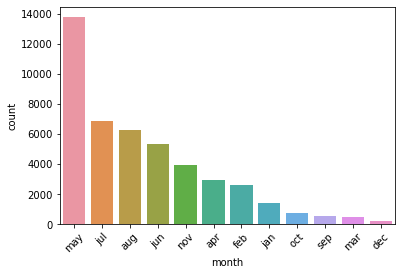

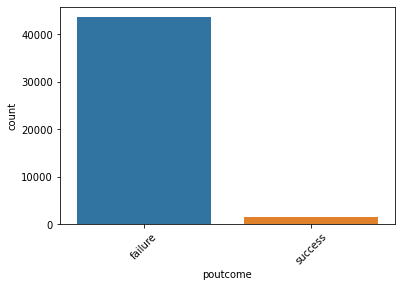

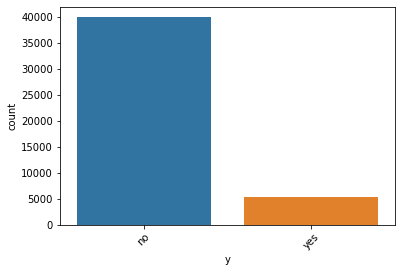

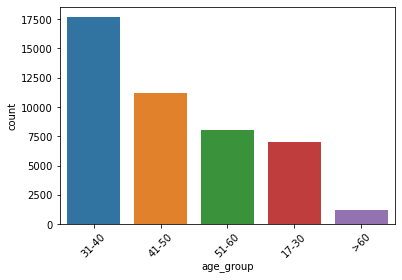

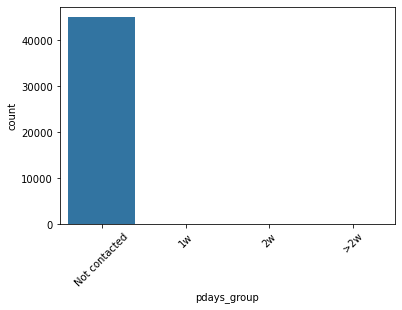

In [314]:
for name in cat_cols:
    sns.countplot(x=name, data=df, order=df[name].value_counts().index[::1])
    plt.xticks(rotation=45)
    plt.show()

## EDA 3 Correlation

In [109]:
corr = df.corr()
corr


,balance,day,duration,campaign,previous
balance,1.000000,0.004519,0.020954,-0.014559,0.020998
day,0.004519,1.000000,-0.030024,0.162479,-0.057160
duration,0.020954,-0.030024,1.000000,-0.084647,0.000452
campaign,-0.014559,0.162479,-0.084647,1.000000,-0.038886
previous,0.020998,-0.057160,0.000452,-0.038886,1.000000


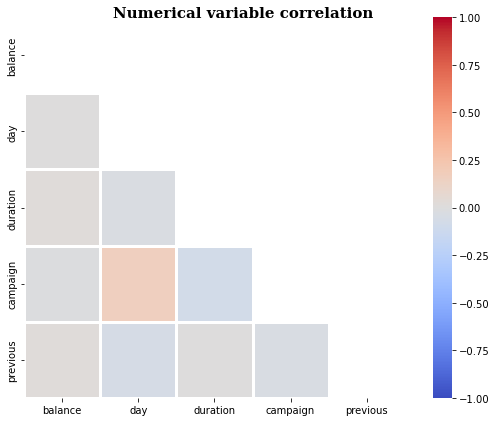

In [110]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,7))
fig.text(.34, .88, 'Numerical variable correlation', fontfamily='serif', fontweight='bold', fontsize=15)
pl = sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1.0, vmin=-1.0, center=0, square=True, linewidths=2.5)
plt.show()

# Clustering

In [348]:
df.describe(include = 'all')

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y,pdays_group,age_group
count,45209,45209,45209,45209,45209.000000,45209,45209,45209,45209.000000,45209,45209.000000,45209.000000,45209.000000,45209,45209,45209,45209
unique,11,2,3,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,2,2,4,5
top,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,failure,no,Not contacted,31-40
freq,10020,27212,25059,44394,NaN,25128,37965,29284,NaN,13766,NaN,NaN,NaN,43698,39920,45021,17686
mean,NaN,NaN,NaN,NaN,1362.174921,NaN,NaN,NaN,15.806853,NaN,258.057997,2.763897,0.574266,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,3044.732112,NaN,NaN,NaN,8.322362,NaN,256.598908,3.098076,1.907947,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,0.000000,NaN,NaN,NaN,NaN


In [343]:
df_num = np.array(df.iloc[:,[4,8,10,11,12]].values)
#df_num = np.array(df.iloc[:,[4,10]].values)
#df_num = np.array(df.iloc[:,[0,5,11,12,13]].values)

In [344]:
#Let's select the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(df_num)
    wcss.append(kmeans.inertia_)
    

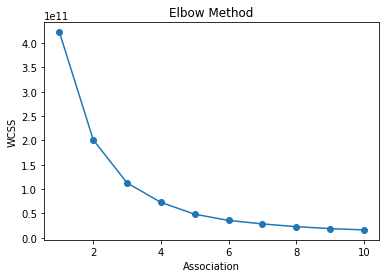

In [345]:
#Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Association')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()


In [346]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df_num)
df_num, y_kmeans

(array([[2143,    5,  261,    1,    0],
        [  29,    5,  151,    1,    0],
        [   2,    5,   76,    1,    0],
        ...,
        [5715,   17, 1127,    5,    3],
        [ 668,   17,  508,    4,    0],
        [2971,   17,  361,    2,   11]]),
 array([0, 0, 0, ..., 3, 0, 3], dtype=int32))

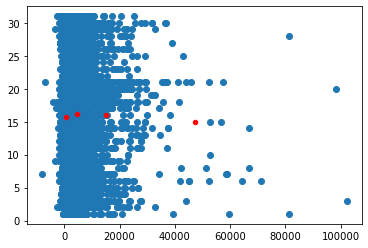

In [347]:

# Plot the data
plt.scatter(df_num[:,], 
            df_num[:,1])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=20,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

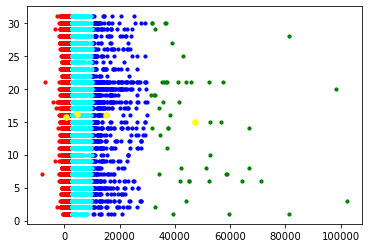

In [331]:
#6 Visualising the clusters
plt.scatter(df_num[y_kmeans==0, 0], df_num[y_kmeans==0, 1], s=10, c='red', label ='Cluster 1')
plt.scatter(df_num[y_kmeans==1, 0], df_num[y_kmeans==1, 1], s=10, c='blue', label ='Cluster 2')
plt.scatter(df_num[y_kmeans==2, 0], df_num[y_kmeans==2, 1], s=10, c='green', label ='Cluster 3')
plt.scatter(df_num[y_kmeans==3, 0], df_num[y_kmeans==3, 1], s=10, c='cyan', label ='Cluster 4')
plt.scatter(df_num[y_kmeans==4, 0], df_num[y_kmeans==4, 1], s=10, c='magenta', label ='Cluster 5')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=30, c='yellow', label = 'Centroids')
#plt.title('Clusters of Customers')
#plt.xlabel('Annual Income(k$)')
#plt.ylabel('Spending Score(1-100')
plt.show()

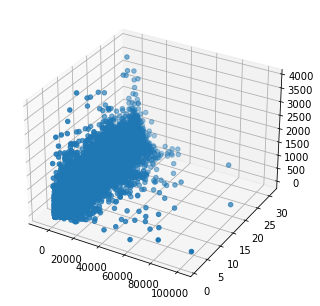

In [332]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_num[:, 0], df_num[:, 1], df_num[:, 2])

## DBSCAN

Text(0.5, 1.0, 'Bank Marketing Data- Age and Balance')

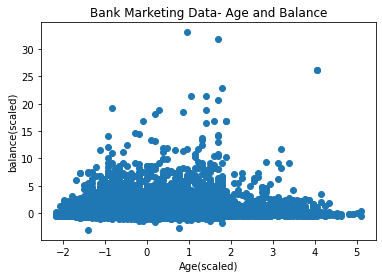

In [270]:
from sklearn.preprocessing import StandardScaler
import numpy as np
stscaler = StandardScaler().fit(df_num)
data = stscaler.transform(df_num)
plt.scatter(data[:,0], data[:,1])
plt.xlabel("Age(scaled)")
plt.ylabel("balance(scaled)")
plt.title("Bank Marketing Data- Age and Balance")

In [268]:
from sklearn.cluster import DBSCAN

dbsc = DBSCAN(eps = .5, min_samples = 15).fit(data)
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

Text(0, 0.5, 'Balance (scaled)')

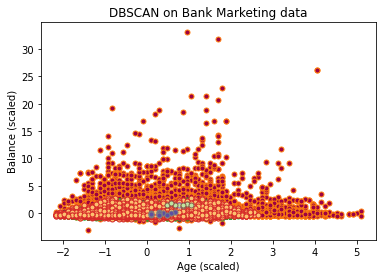

In [271]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))


for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = data[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = color, markersize = 5)
    
    xy2 = data[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = color, markersize = 5)
plt.title("DBSCAN on Bank Marketing data")
plt.xlabel("Age (scaled)")
plt.ylabel("Balance (scaled)")

Text(0, 0.5, 'Balance (scaled)')

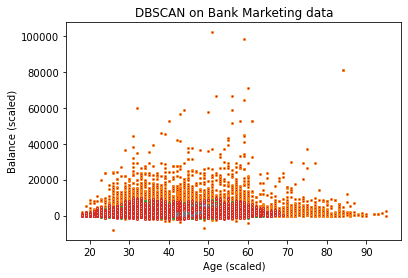

In [275]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = df_num[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = color, markersize = 2)
    
    xy2 = df_num[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = color, markersize = 2)
plt.title("DBSCAN on Bank Marketing data")
plt.xlabel("Age (scaled)")
plt.ylabel("Balance (scaled)")

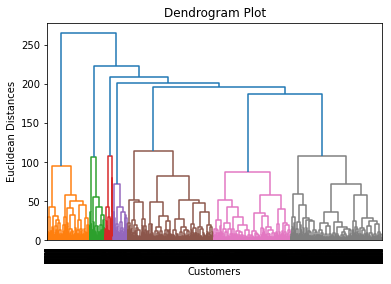

In [282]:
from matplotlib import pyplot as mtp
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(data, method="ward"))  
mtp.title("Dendrogram Plot")  
mtp.ylabel("Euclidean Distances")  
mtp.xlabel("Customers")  
mtp.show()

### TSNE and PCA 

In [285]:
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.manifold import TSNE # TSNE module

In [297]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['y'])
 
# printing label
label

KeyError: 'y'

In [296]:
# removing the column 'Purchased' from df
# as it is of no use now.
df.drop("y", axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'Purchased'
df["y"] = label
 
# printing Dataframe
df

KeyError: "['y'] not found in axis"

In [ ]:
target = df['y']
df = df

In [288]:
X = df_num

# Invoke the PCA method. Since this is a binary classification problem
# let's call n_components = 2
pca = PCA(n_components=1)
pca_2d = pca.fit_transform(X)

# Invoke the TSNE method
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 45209 samples in 0.035s...
[t-SNE] Computed neighbors for 45209 samples in 1.306s...
[t-SNE] Computed conditional probabilities for sample 1000 / 45209
[t-SNE] Computed conditional probabilities for sample 2000 / 45209
[t-SNE] Computed conditional probabilities for sample 3000 / 45209
[t-SNE] Computed conditional probabilities for sample 4000 / 45209
[t-SNE] Computed conditional probabilities for sample 5000 / 45209
[t-SNE] Computed conditional probabilities for sample 6000 / 45209
[t-SNE] Computed conditional probabilities for sample 7000 / 45209
[t-SNE] Computed conditional probabilities for sample 8000 / 45209
[t-SNE] Computed conditional probabilities for sample 9000 / 45209
[t-SNE] Computed conditional probabilities for sample 10000 / 45209
[t-SNE] Computed conditional probabilities for sample 11000 / 45209
[t-SNE] Computed conditional probabilities for sample 12000 / 45209
[t-SNE] Computed conditional probabilities for sa

NameError: name 'target' is not defined

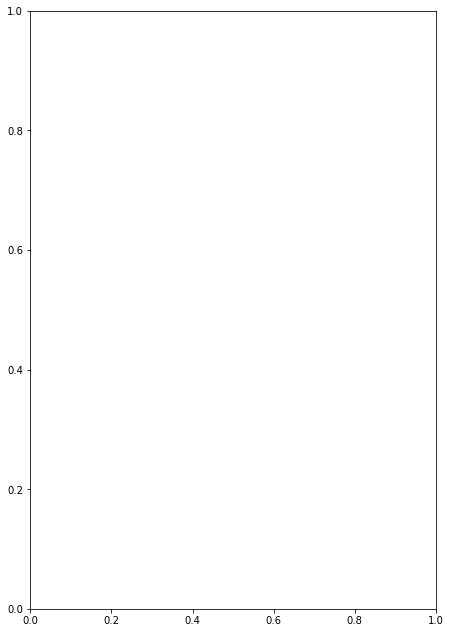

In [292]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(pca_2d[:,0],pca_2d[:,0], c = target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results[:,0],tsne_results[:,1],  c = target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()

# Fitting Model

In [ ]:
def dmp_first_classifier(model):
    classifier = model()
    classifier.fit(train_X, train_y)
    print(classifier.score(test_X, test_y))
    return classifier

Decision_tree = dmp_first_classifier(SGDClassifier)